In [1]:
import pandas as pd
births=pd.read_csv("births.csv") 
births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [3]:
print(births.isnull().sum())

year        0
month       0
day       480
gender      0
births      0
dtype: int64


In [8]:
births["day"].fillna(0,inplace=True)  #fillna creates floats (NaN is float), so after replacing NaN with 0, the column is still float64.
births["day"]=births["day"].astype(int)
print(births.isnull().sum())

year      0
month     0
day       0
gender    0
births    0
dtype: int64


/var/folders/dt/kw_3vlx50xng030cvztnn88c0000gn/T/ipykernel_17781/1651905694.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  births["day"].fillna(0,inplace=True)  #fillna creates floats (NaN is float), so after replacing NaN with 0, the column is still float64.


In [15]:
births["decade"]=10*(births["year"]//10)
births.pivot_table("births",index="decade",columns="gender",aggfunc="sum")

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


In [16]:
print(births.head())

   year  month  day gender  births  decade
0  1969      1    1      F    4046    1960
1  1969      1    1      M    4440    1960
2  1969      1    2      F    4454    1960
3  1969      1    2      M    4548    1960
4  1969      1    3      F    4548    1960


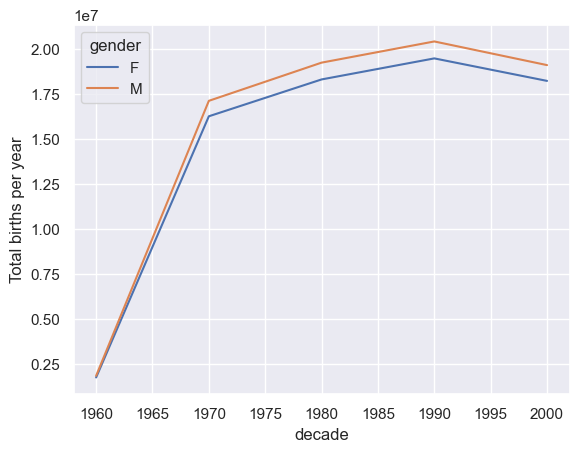

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
birth_decade=births.pivot_table("births",index="decade",columns="gender",aggfunc="sum")
birth_decade.plot()
plt.ylabel("Total births per year")
plt.show()